# Aula 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

#%precision %.2f
#pd.options.display.float_format = '{:,.2f}'.format

dados = pd.read_csv('enem_2018.csv')
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,...,A,B,A,A,D,B,B,B,A,A


In [2]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_LC']
dados = dados[colunas_notas].fillna(value=0.0)

In [3]:
X = dados[colunas_notas].drop('NU_NOTA_LC', axis=1)
X.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.0,0.0,0.0,0.0
1,523.1,671.3,738.0,680.0
2,409.2,531.7,438.1,600.0
3,452.3,505.5,544.9,400.0
4,0.0,0.0,0.0,0.0


In [4]:
y = dados['NU_NOTA_LC']

In [5]:
np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.35)

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [6]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

modelo = LinearSVR(epsilon=0.0, tol=0.00001, C=1.0)
modelo.fit(x_treino, y_treino)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=1e-05, verbose=0)

In [7]:
predicoes = modelo.predict(x_teste)
predicoes[:5]

array([-7.80859432e-06,  3.94382396e+02,  5.57409519e+02, -7.80859432e-06,
        3.78026433e+02])

In [8]:
y_teste[:5].values

array([  0. , 476.3, 625.6,   0. , 464.9])

In [9]:
mean_squared_error(predicoes, y_teste)

2660.933646583136

In [10]:
config_start = 1
config_n = 50
config_step = 2.5

config_c = np.arange(config_start, config_n, config_step)
config_models = len(config_c)

In [11]:
modelos = [LinearSVR(epsilon=0.0, tol=0.0001, C=i) for i in config_c]

In [12]:
modelos_fit = [modelos[i].fit(x_treino, y_treino) for i in range(0,config_models)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [13]:
predicoes_modelos = [modelos[i].predict(x_teste) for i in range(0,config_models)]

In [14]:
erros = [mean_squared_error(predicoes_modelos[i], y_teste) for i in range(0,config_models)]

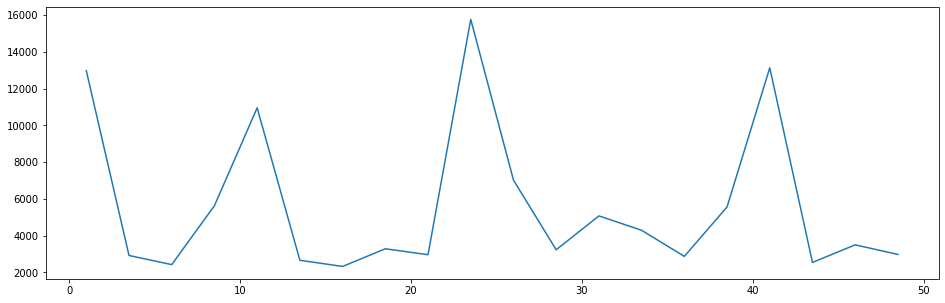

In [15]:
plt.figure(figsize=(16,5))
sns.lineplot(
    config_c,
    erros
)

In [16]:
df_comp = pd.DataFrame([config_c, erros], index=['C','erro']).T
df_comp.sort_values('erro').head()

,C,erro
6,16.0,2327.093347
2,6.0,2426.486329
17,43.5,2546.213769
5,13.5,2662.796824
14,36.0,2873.913055


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

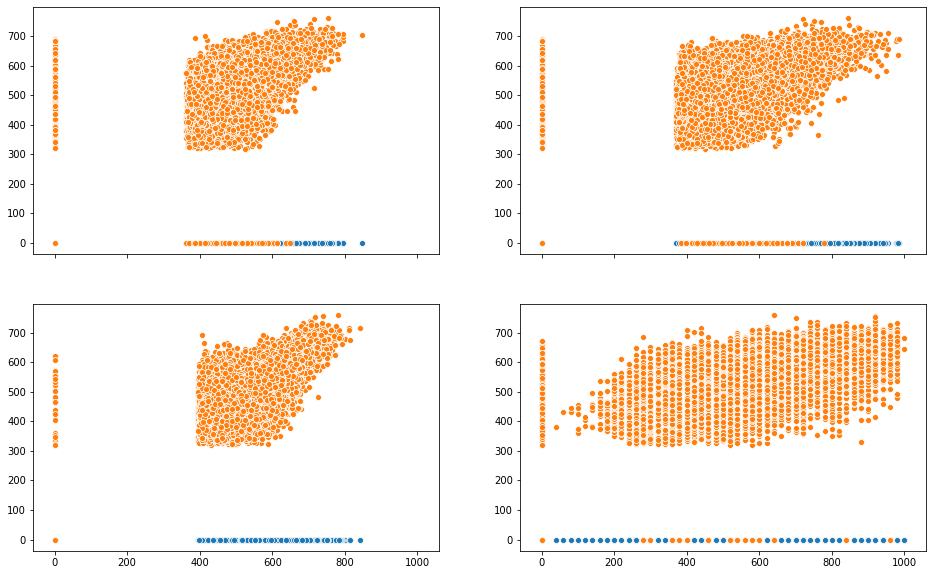

In [17]:
f, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

sns.scatterplot(x=x_teste['NU_NOTA_CN'].values, y=predicoes[0], ax=axes[0, 0])
sns.scatterplot(x=x_teste['NU_NOTA_CN'].values, y=y_teste.values, ax=axes[0, 0])

sns.scatterplot(x=x_teste['NU_NOTA_MT'].values, y=predicoes[0], ax=axes[0, 1])
sns.scatterplot(x=x_teste['NU_NOTA_MT'].values, y=y_teste.values, ax=axes[0, 1])

sns.scatterplot(x=x_teste['NU_NOTA_CH'].values, y=predicoes[0], ax=axes[1, 0])
sns.scatterplot(x=x_teste['NU_NOTA_CH'].values, y=y_teste.values, ax=axes[1, 0])

sns.scatterplot(x=x_teste['NU_NOTA_REDACAO'].values, y=predicoes[0], ax=axes[1, 1])
sns.scatterplot(x=x_teste['NU_NOTA_REDACAO'].values, y=y_teste.values, ax=axes[1, 1])

plt.show()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [18]:
dados = pd.read_csv('enem_2018.csv')
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_LC']
dados = dados[colunas_notas].dropna()

filtro = dados.query('NU_NOTA_CN>0 & NU_NOTA_CH>0 & NU_NOTA_MT>0 & NU_NOTA_REDACAO>0 & NU_NOTA_LC>0')
dados = dados.loc[filtro.index]

In [19]:
X = dados[colunas_notas].drop('NU_NOTA_LC', axis=1)
y = dados['NU_NOTA_LC']

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.35)

In [20]:
modelo_zero = LinearSVR(epsilon=0.0, tol=0.00001, C=1.0)
modelo_zero.fit(x_treino, y_treino)

predicoes = modelo_zero.predict(x_teste)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
mean_squared_error(predicoes, y_teste)

4002.31376130688

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [28]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.35)

In [29]:
modelo_zero = LinearSVR(epsilon=0.0, tol=0.00001, C=1.0)
modelo_zero.fit(x_treino, y_treino)

predicoes = modelo_zero.predict(x_treino)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
mean_squared_error(predicoes, y_treino)

16119.640373534612